In [1]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import WongNeuralNetCIFAR10
import matplotlib.pyplot as plt
import os

In [2]:
!pip install pytorch_memlab

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from Boosting import Ensemble, runBoosting
from AdversarialAttacks import attack_fgsm, attack_pgd
from pytorch_memlab import LineProfiler

In [4]:
import utils

In [5]:
cuda = torch.device('cuda:0')

In [6]:
%load_ext autoreload
%autoreload 2

## CIFAR10 Boosting (Adversarial)

In [7]:
# maxSamples_vals = [100000, 200000, 500000]
maxSamples_vals = [750000]
# maxSamples_vals = [30001]
# maxSamples_vals = [500000, 1000000]
# done for 50K, 100K
# maxSamples_vals = [1000000, 2000000]
# maxSamples_vals = [123456]
batch_size=100
# maxSamples_vals = [batch_size + 1]

In [8]:
num_wl = 2 # maybe around 100? #later: maybe change this to an array?
num_epochs = 1

In [9]:
ensembles = []
# epsilons = [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
epsilons = [0.01, 0.02, 0.03]
train_eps_nn = 0
# epsilons = []
# epsilons = [0.0, 0.01]

In [12]:
# from Boosting import SchapireWongMulticlassBoosting
from AdversarialAttacks import attack_fgsm, attack_pgd
import gc
# Ensemble.record_accuracies, Ensemble.calc_accuracies, attack_fgsm, Ensemble.schapireContinuousPredict
for i in range(len(maxSamples_vals)):
    print("len(maxSamples_vals):", len(maxSamples_vals))
    maxSamples = maxSamples_vals[i]
    print("maxSamples:", maxSamples)
    ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.CIFAR10, weakLearnerType = WongNeuralNetCIFAR10, val_attacks = [], 
                               attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=train_eps_nn, adv_train_prefix=num_wl, batch_size=batch_size, val_flag=False)
    print("number of wl in ensemble:", len(ensemble.weakLearners))
    ensembles.append(ensemble)
    gc.collect()
#     for obj in gc.get_objects():
#         try:
#             if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
#                 print(type(obj), obj.size())
#         except:
#             pass
    
#     path_head = f'results/plots/cifar10/train_eps_{train_eps_nn}/'
#     try:
#         os.mkdir(path_head)
#     except OSError:
#         pass
#     acc_file = path_head + f'acc_maxSamples_{maxSamples}.png'
#     adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
#     loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
#     wl_train_acc_file = path_head + f'wl_train_acc_maxSamples_{maxSamples}.png'
#     ensemble.plot_accuracies(acc_file)
#     ensemble.plot_loss(loss_file)
#     ensemble.plot_adversarial_accuracies(adv_acc_file)
#     ensemble.plot_wl_acc(wl_train_acc_file)


len(maxSamples_vals): 1
maxSamples: 750000
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
attack eps ens [0.01, 0.02, 0.03]
path_head: ./models/750000Eps0/
----------------------------------------------------------------------------------------------------
Training weak learner 0
Epoch 0


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/cifar.py:118: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img, target = self.data[index], self.targets[index]


Progress: 10000,  val accuracy: 0.3200
Progress: 20000,  val accuracy: 0.4200
Progress: 30000,  val accuracy: 0.5000
Progress: 40000,  val accuracy: 0.4800
Progress: 50000,  val accuracy: 0.5300


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:893: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Epoch 1
Progress: 60000,  val accuracy: 0.5800
Progress: 70000,  val accuracy: 0.5800
Progress: 80000,  val accuracy: 0.6800
Progress: 90000,  val accuracy: 0.6900
Progress: 100000,  val accuracy: 0.7000
Epoch 2
Progress: 110000,  val accuracy: 0.7300
Progress: 120000,  val accuracy: 0.7300
Progress: 130000,  val accuracy: 0.7500
Progress: 140000,  val accuracy: 0.7500
Progress: 150000,  val accuracy: 0.7300
Epoch 3
Progress: 160000,  val accuracy: 0.7600
Progress: 170000,  val accuracy: 0.7300
Progress: 180000,  val accuracy: 0.7700
Progress: 190000,  val accuracy: 0.7400
Progress: 200000,  val accuracy: 0.7500
Epoch 4
Progress: 210000,  val accuracy: 0.7500
Progress: 220000,  val accuracy: 0.8300
Progress: 230000,  val accuracy: 0.7900
Progress: 240000,  val accuracy: 0.8000
Progress: 250000,  val accuracy: 0.8200
Epoch 5
Progress: 260000,  val accuracy: 0.8000
Progress: 270000,  val accuracy: 0.8200
Progress: 280000,  val accuracy: 0.8600
Progress: 290000,  val accuracy: 0.8500
Prog

./models/750000Eps0/
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Weak Learner  0 .  Time Elapsed (s):  0
pgd called with 0.0313 0.01 20 1
[-0.00380964 -0.02499999 -0.0128318  ... -0.02402604  0.01226771
  0.00929559]


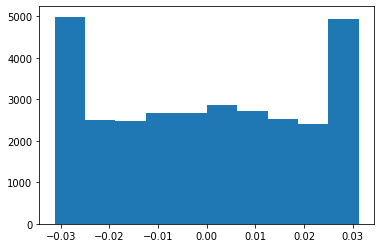

acc:  0.0
{'val': 0.6, <function attack_pgd at 0x7fabaa1e2400>: [0.0]}
pgd called with 0.0313 0.01 20 1
[-0.0213      0.01636825  0.0013     ... -0.00641724  0.00201746
 -0.0313    ]


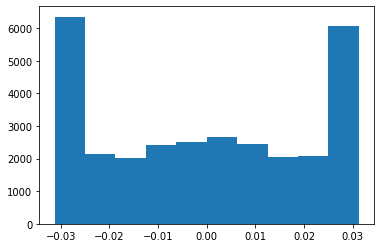

acc:  0.0
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.0]}
pgd called with 0.0313 0.01 20 1
[-0.02361442 -0.0313     -0.0113     ...  0.00510184 -0.02973661
 -0.0008908 ]


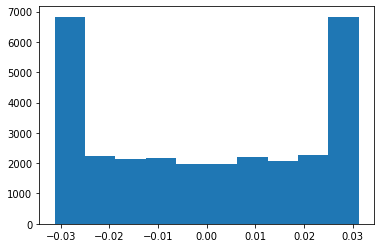

acc:  0.1
{'val': 0.7, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[ 0.02295329 -0.00260223  0.00948877 ...  0.0313      0.0313
 -0.0313    ]


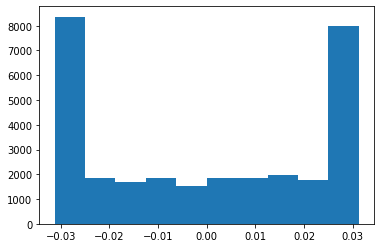

acc:  0.2
{'val': 1.0, <function attack_pgd at 0x7fabaa1e2400>: [0.2]}
pgd called with 0.0313 0.01 20 1
[ 0.01972936  0.01863387 -0.0313     ... -0.01657873  0.00808161
 -0.0006427 ]


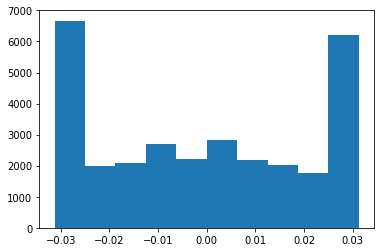

acc:  0.0
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.0]}
pgd called with 0.0313 0.01 20 1
[ 0.0313      0.0213      0.0313     ... -0.0313     -0.00064772
 -0.0313    ]


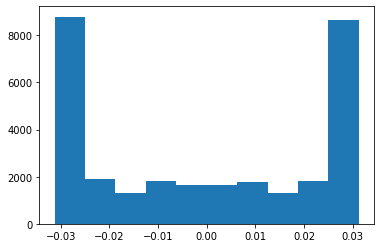

acc:  0.1
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[ 0.0313      0.00033279  0.00708841 ...  0.01325084 -0.01438987
  0.0313    ]


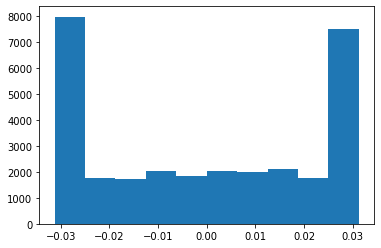

acc:  0.1
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[ 0.01774409  0.01044007 -0.01194807 ...  0.01964177 -0.02334314
  0.02678871]


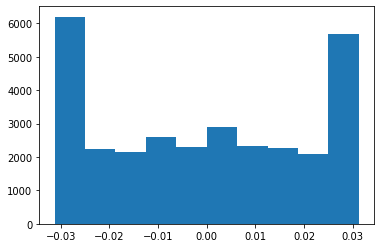

acc:  0.0
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.0]}
pgd called with 0.0313 0.01 20 1
[-0.0313      0.01059083  0.0313     ...  0.01250306 -0.00092354
 -0.02264344]


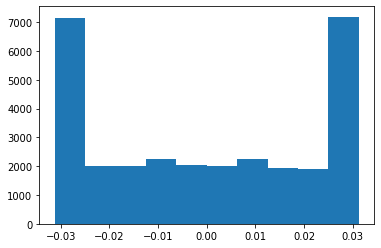

acc:  0.1
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[-0.0313      0.0213     -0.00669508 ... -0.0313     -0.0313
 -0.02724603]


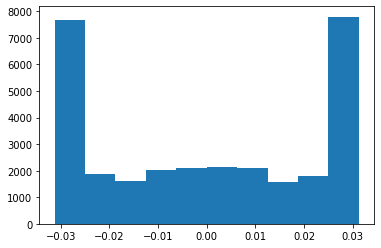

acc:  0.2
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.2]}
pgd called with 0.0313 0.01 20 1
[ 0.01245343 -0.03017336 -0.02695802 ...  0.03097932 -0.0313
 -0.02525222]


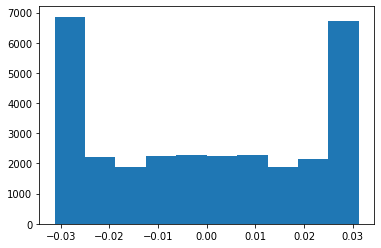

acc:  0.1
{'val': 0.8, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[ 0.0313     -0.0313      0.0313     ...  0.00325318 -0.01330633
 -0.00600584]


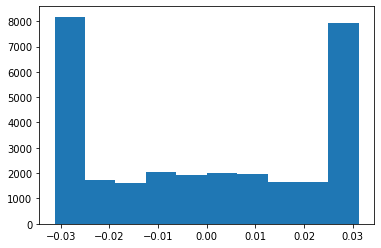

acc:  0.2
{'val': 1.0, <function attack_pgd at 0x7fabaa1e2400>: [0.2]}
pgd called with 0.0313 0.01 20 1
[-0.02838392 -0.02538171 -0.0313     ...  0.01281731 -0.02664747
 -0.0313    ]


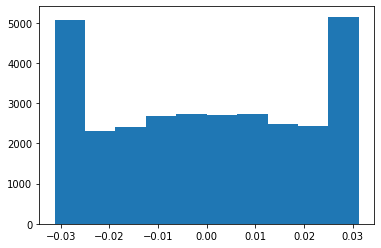

acc:  0.0
{'val': 0.7, <function attack_pgd at 0x7fabaa1e2400>: [0.0]}
pgd called with 0.0313 0.01 20 1
[ 0.00756906 -0.02301119 -0.01079254 ... -0.00728987 -0.00320453
 -0.03126217]


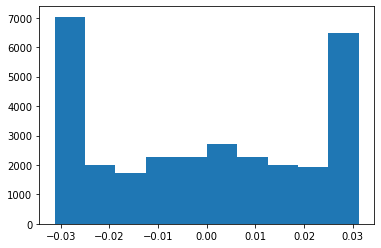

acc:  0.1
{'val': 0.7, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[ 0.02721254 -0.00292562  0.01266597 ...  0.02925364 -0.01442528
 -0.0313    ]


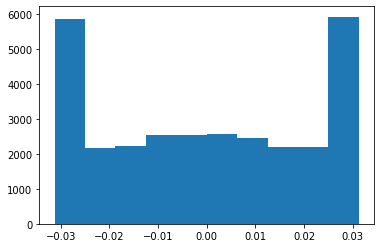

acc:  0.0
{'val': 0.7, <function attack_pgd at 0x7fabaa1e2400>: [0.0]}
pgd called with 0.0313 0.01 20 1
[-0.0313      0.03051418 -0.0286695  ... -0.00494892  0.0313
 -0.0263001 ]


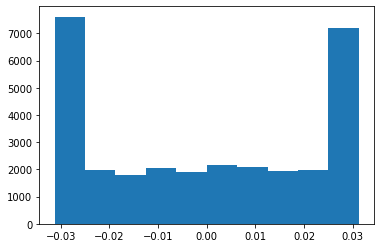

acc:  0.1
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[-0.0313     -0.02389741  0.02739155 ...  0.00050322 -0.01863889
 -0.0313    ]


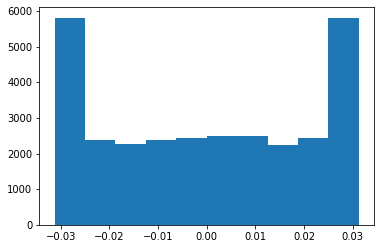

acc:  0.0
{'val': 0.5, <function attack_pgd at 0x7fabaa1e2400>: [0.0]}
pgd called with 0.0313 0.01 20 1
[-0.0313      0.         -0.0313     ...  0.00282899  0.02896719
  0.01394522]


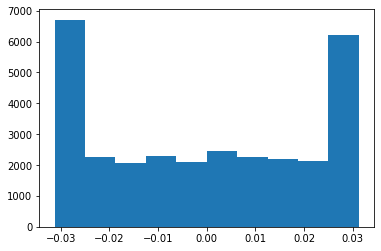

acc:  0.1
{'val': 0.7, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[ 0.02157088  0.0313     -0.0313     ...  0.02186851  0.0313
 -0.01382727]


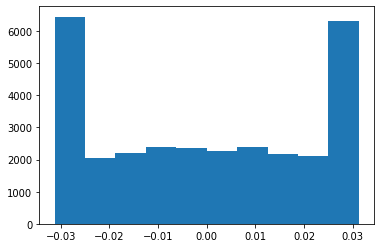

acc:  0.1
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[ 0.0313     -0.03075399  0.0313     ... -0.02731356  0.00016503
  0.00577159]


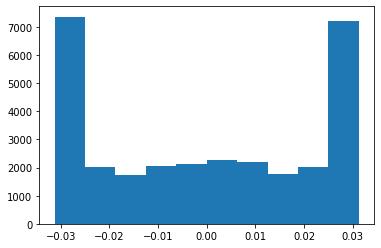

acc:  0.1
{'val': 0.8, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[-0.01964548 -0.00529842 -0.0313     ...  0.021191   -0.01519609
 -0.0247797 ]


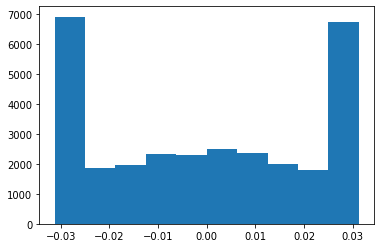

acc:  0.1
{'val': 1.0, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[-0.006411    0.0088423   0.01083731 ...  0.0213      0.01901373
  0.0313    ]


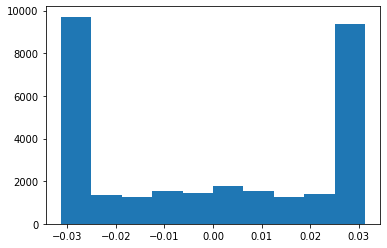

acc:  0.5
{'val': 1.0, <function attack_pgd at 0x7fabaa1e2400>: [0.5]}
pgd called with 0.0313 0.01 20 1
[ 0.0313      0.00158214  0.00396233 ...  0.0313      0.01109804
 -0.0313    ]


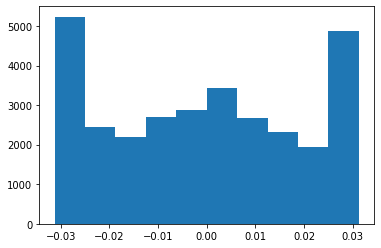

acc:  0.0
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.0]}
pgd called with 0.0313 0.01 20 1
[ 0.02814692  0.0313      0.         ... -0.0313     -0.0213
 -0.0087    ]


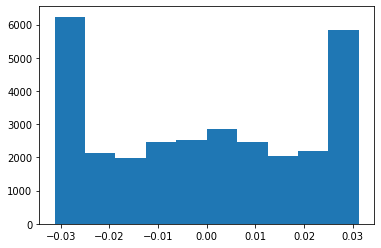

acc:  0.0
{'val': 0.8, <function attack_pgd at 0x7fabaa1e2400>: [0.0]}
pgd called with 0.0313 0.01 20 1
[ 0.0313     -0.0313     -0.0313     ...  0.01454155 -0.0313
 -0.02568906]


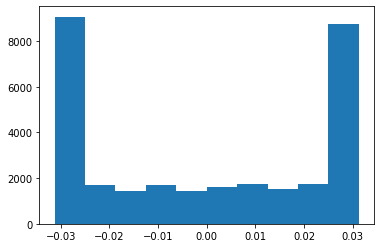

acc:  0.1
{'val': 1.0, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[-0.02108638 -0.0287226   0.001356   ... -0.0313      0.0313
 -0.0313    ]


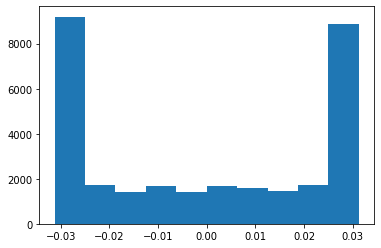

acc:  0.2
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.2]}
pgd called with 0.0313 0.01 20 1
[-0.0313     -0.0313     -0.0313     ...  0.02220487  0.02757149
  0.00711817]


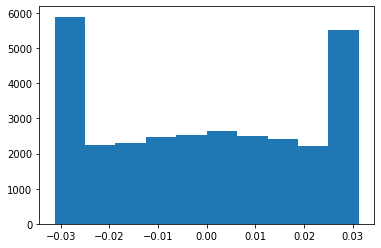

acc:  0.1
{'val': 0.7, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[-2.5503099e-02  3.1300001e-02  9.0508256e-03 ... -2.9806048e-05
 -1.0232955e-02 -2.5393441e-04]


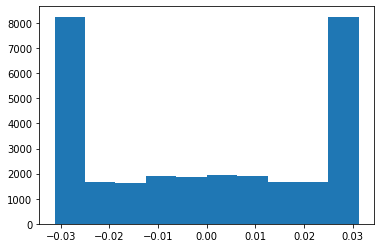

acc:  0.3
{'val': 1.0, <function attack_pgd at 0x7fabaa1e2400>: [0.3]}
pgd called with 0.0313 0.01 20 1
[-0.0200728   0.0161519   0.02849825 ... -0.00315804  0.00921494
 -0.02009472]


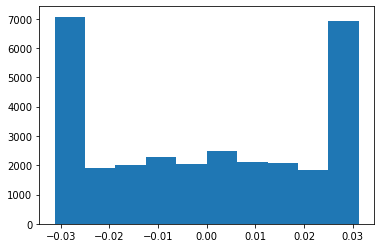

acc:  0.1
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[ 0.00491125 -0.00622312 -0.01082507 ... -0.0313      0.0313
 -0.0313    ]


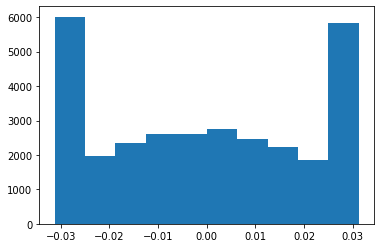

acc:  0.1
{'val': 1.0, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[ 0.00327797  0.01824705  0.         ...  0.01575284  0.00962255
 -0.00601405]


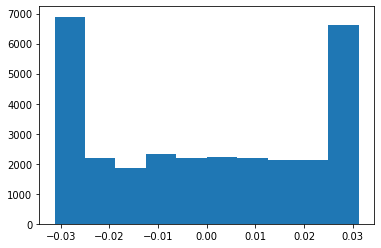

acc:  0.0
{'val': 0.7, <function attack_pgd at 0x7fabaa1e2400>: [0.0]}
pgd called with 0.0313 0.01 20 1
[-0.0313     -0.0313     -0.01666032 ... -0.0213      0.02962053
  0.0313    ]


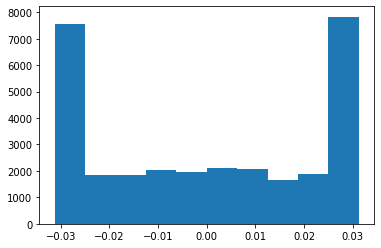

acc:  0.1
{'val': 0.9, <function attack_pgd at 0x7fabaa1e2400>: [0.1]}
pgd called with 0.0313 0.01 20 1
[-0.01392233 -0.00866668  0.02129918 ... -0.00713307  0.0313
 -0.020269  ]


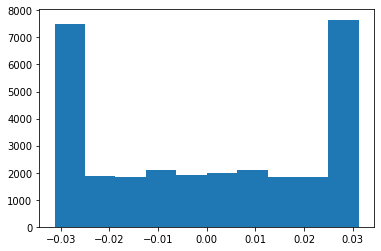

acc:  0.0
{'val': 1.0, <function attack_pgd at 0x7fabaa1e2400>: [0.0]}
pgd called with 0.0313 0.01 20 1


In [ ]:
from Testing import testEnsemble
path = f'./models/{maxSamples_vals[0]}Eps{train_eps_nn}/'
attack=attack_pgd
attackStr="attack_pgd"
print(path)
ensemble = testEnsemble(path, [attack], 1, numsamples_train=500, numsamples_val=500, attack_eps_ensemble=[0.0313]) 

In [10]:
from Testing import testEnsemble
path = f'./models/{maxSamples_vals[0]}Eps{train_eps_nn}/'
attack=attack_pgd
attackStr="attack_pgd"
ensemble = testEnsemble(path, [attack], num_wl, numsamples_train=500, numsamples_val=500, attack_eps_ensemble=epsilons) 

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Weak Learner  0 .  Time Elapsed (s):  0
ensemble accuracies: {'train': [0.8795918367346934], 'val': [0.8448979591836732], 'attack_fgsm': [], 'attack_pgd': [[0.5755102040816324], [0.2755102040816326], [0.09591836734693877]], 'wl_train': [], 'wl_val': []}
Weak Learner  1 .  Time Elapsed (s):  488
ensemble accuracies: {'train': [0.8795918367346934, 0.9040816326530609], 'val': [0.8448979591836732, 0.8816326530612241], 'attack_fgsm': [], 'attack_pgd': [[0.5755102040816324, 0.6326530612244898], [0.2755102040816326, 0.3122448979591837], [0.09591836734693877, 0.1326530612244898]], 'wl_train': [], 'wl_val': []}
Weak Learner  2 .  Time Elapsed (s):  1496
ensemble accuracies: {'train': [0.8795918367346934, 0.9040816326530609, 0.9530612244897956], 'val': [0.8448979591836732, 0.8816326530612241, 0.9122448979591833], 'attack_fgsm': [], 'attack_pgd': [[0.5755102040816324, 0.63265306122448

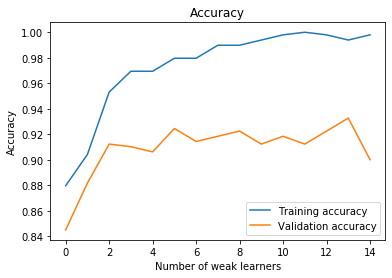

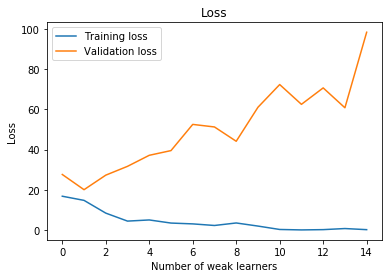

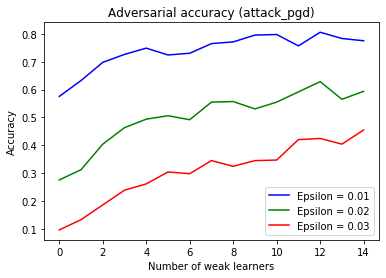

In [11]:
maxSamples = maxSamples_vals[0]
resultsPath = f'results/plots/cifar10/train_eps_{train_eps_nn}/{attackStr}/'
acc_file = resultsPath + f'acc_maxSamples_{maxSamples}.png'
adv_acc_file = resultsPath + f'adv_acc_maxSamples_{maxSamples}.png'
loss_file = resultsPath + f'loss_maxSamples_{maxSamples}.png'
# wl_train_acc_file = resultsPath + f'wl_train_acc_maxSamples_{maxSamples}.png'
ensemble.plot_accuracies(acc_file)
ensemble.plot_loss(loss_file)
ensemble.plot_adversarial_accuracies(adv_acc_file)
# ensemble.plot_wl_acc(wl_train_acc_file)


In [ ]:
# for maxSamples in maxSamples_vals:
#         ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.CIFAR10, weakLearnerType = WongNeuralNetCIFAR10, val_attacks = [attack_fgsm], 
#                                attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=8, adv_train=True)
#         ensembles.append(ensemble)

In [ ]:
print(ensemble.accuracies)

In [ ]:
ensembles[0].plot_train_loss()
ensembles[0].plot_val_loss()
ensembles[0].plot_train_accuracies()
ensembles[0].plot_val_accuracies()

In [ ]:
ensembles[0].attack_eps

In [ ]:
ensembles[0].plot_wl_acc()

In [ ]:
ensemble

## Sanity Checking PGD Attack

In [17]:
TestNN = WongNeuralNetCIFAR10(attack_eps=[0.03])

In [18]:
TestNN.model.load_state_dict(torch.load("./models/750000Eps0/wl_0.pth"))
TestNN.model.cuda()
TestNN.model.eval()
print("")

In [19]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

trainset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=100, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


pgd called with 0.03 0.01 20 1
[-0.00984019 -0.00649809 -0.00305522 ... -0.03        0.03
  0.03      ]


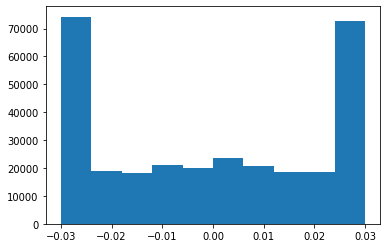

acc:  0.14
{'val': 0.86, <function attack_pgd at 0x7fc4e2b87400>: [0.14]}


In [20]:
i = 0
accs = []
for data in test_loader:
    X = data[0]
    y = data[1]
    losses, acc = TestNN.calc_accuracies(X.cuda(), y.cuda(), val_attacks=[attack_pgd], attack_iters=20)
    print(acc)
    
#     if i>5:
    break
    i+=1

pgd called with 0.03 0.01 20 1
[-0.02856857 -0.0021916  -0.01201383 ... -0.01790334  0.02073131
 -0.03      ]


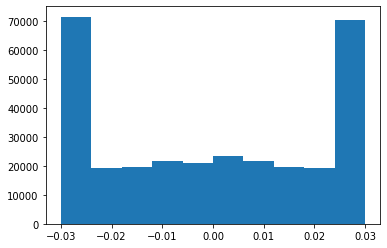

acc:  0.11
{'val': 0.86, <function attack_pgd at 0x7fc4e2b87400>: [0.11]}
pgd called with 0.03 0.01 20 1
[-0.00827936 -0.02992373  0.01021506 ... -0.01654182 -0.00104857
  0.01855921]


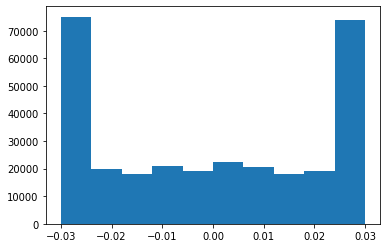

acc:  0.09
{'val': 0.87, <function attack_pgd at 0x7fc4e2b87400>: [0.09]}
pgd called with 0.03 0.01 20 1
[-0.01923274 -0.02139034  0.03       ...  0.         -0.03
  0.        ]


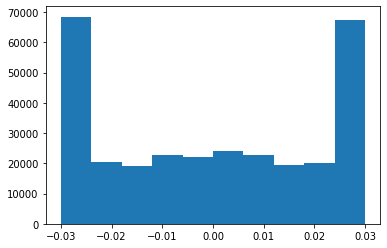

acc:  0.06
{'val': 0.84, <function attack_pgd at 0x7fc4e2b87400>: [0.06]}
pgd called with 0.03 0.01 20 1
[-0.01744878 -0.01610704  0.00393204 ... -0.01542993 -0.03
 -0.00423794]


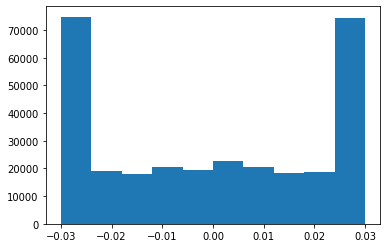

acc:  0.13
{'val': 0.9, <function attack_pgd at 0x7fc4e2b87400>: [0.13]}
pgd called with 0.03 0.01 20 1
[ 0.03       -0.01925849 -0.01494525 ...  0.01248405 -0.03
 -0.01672453]


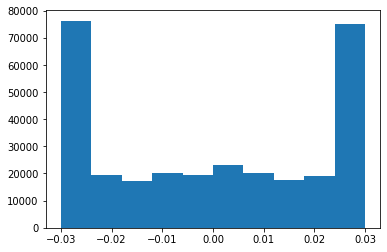

acc:  0.14
{'val': 0.86, <function attack_pgd at 0x7fc4e2b87400>: [0.14]}
pgd called with 0.03 0.01 20 1
[ 0.02128275  0.01869717  0.03       ... -0.03        0.03
 -0.03      ]


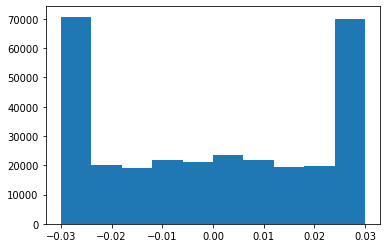

acc:  0.07
{'val': 0.88, <function attack_pgd at 0x7fc4e2b87400>: [0.07]}
pgd called with 0.03 0.01 20 1
[ 0.00836762  0.01230096  0.02       ...  0.03       -0.01226729
  0.03      ]


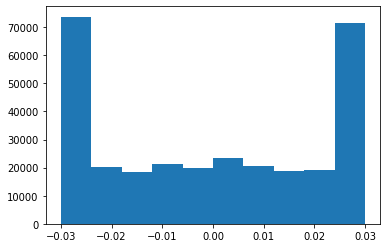

acc:  0.14
{'val': 0.81, <function attack_pgd at 0x7fc4e2b87400>: [0.14]}
pgd called with 0.03 0.01 20 1
[ 0.02398189  0.01916029 -0.00195976 ...  0.03        0.01751919
 -0.03      ]


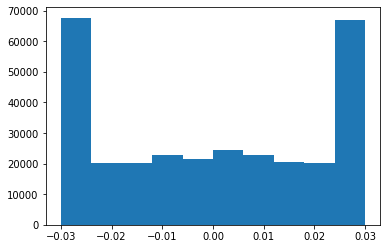

acc:  0.1
{'val': 0.83, <function attack_pgd at 0x7fc4e2b87400>: [0.1]}
pgd called with 0.03 0.01 20 1
[-0.03        0.03       -0.03       ... -0.03       -0.00548702
 -0.01308539]


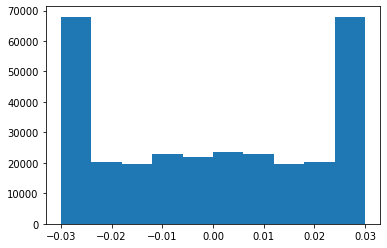

acc:  0.09
{'val': 0.83, <function attack_pgd at 0x7fc4e2b87400>: [0.09]}
ensemble accuracies: {'train': [0.8599999999999999], 'val': [0.8533333333333333], 'attack_fgsm': [], 'attack_pgd': [[0.10333333333333333]], 'wl_train': [], 'wl_val': []}


In [14]:
ensemble = Ensemble(weakLearners=[], weakLearnerWeights=[], weakLearnerType=WongNeuralNetCIFAR10, attack_eps=[0.03])
ensemble.losses["val"]
for i in range(1):
    ensemble.addWeakLearner("./models/750000Eps0/wl_0.pth", 1)
#         print("before ens acc", ensemble.accuracies)

    ensemble.record_accuracies(i, train_loader, test_loader, 1000, 1000, val_attacks=[attack_pgd])
    print("ensemble accuracies:", ensemble.accuracies)

## Sanity check for PGD (single weak learner and ensemble)

In [10]:
# pgd_steps = [20, 40, 60, 80, 100]
pgd_steps = [20]
attack_eps = [0.3]
num_wl = 1
from Testing import testEnsemble


Files already downloaded and verified
pgd called with 0.3 0.01 20 1
[ 0.          0.         -0.298182   ... -0.11172536  0.26904547
  0.10823703]


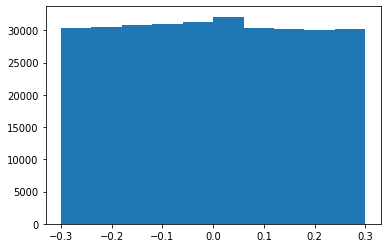

acc:  0.0
{'val': 0.86, <function attack_pgd at 0x7f74fc95e400>: [0.0]}


In [11]:
#Test pgd on weak learners
for attack_iters in pgd_steps:
    TestNN = WongNeuralNetCIFAR10(attack_eps=attack_eps)
    TestNN.model.load_state_dict(torch.load("./models/750000Eps0/wl_0.pth"))
    TestNN.model.cuda()
    TestNN.model.eval()
    print("")

    # Normalize the test set same as training set without augmentation
    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
    ])

    testset = datasets.CIFAR10(
        root="./data", train=False, download=True, transform=transform_test)
    test_loader = torch.utils.data.DataLoader(
        testset, batch_size=100, shuffle=True, num_workers=2)
    i = 0
    accs = []
    for data in test_loader:
        X = data[0]
        y = data[1]
        losses, acc = TestNN.calc_accuracies(X.cuda(), y.cuda(), val_attacks=[attack_pgd], attack_iters=attack_iters)
        print(acc)

    #     if i>5:
        break
        i+=1

In [ ]:
# Test pgd on ensemble
for attack_iters in pgd_steps:
        path = f'./models/{maxSamples_vals[0]}Eps{train_eps_nn}/'
    attack=attack_pgd
    attackStr="attack_pgd"
    ensemble = testEnsemble(path, [attack], num_wl, numsamples_train=500, numsamples_val=500, attack_eps_ensemble=epsilons)
    maxSamples = maxSamples_vals[0]
    resultsPath = f'results/plots/cifar10/train_eps_{train_eps_nn}_iter_{attack_iters}/{attackStr}/'
    acc_file = resultsPath + f'acc_maxSamples_{maxSamples}.png'
    adv_acc_file = resultsPath + f'adv_acc_maxSamples_{maxSamples}.png'
    loss_file = resultsPath + f'loss_maxSamples_{maxSamples}.png'
    # wl_train_acc_file = resultsPath + f'wl_train_acc_maxSamples_{maxSamples}.png'
    ensemble.plot_accuracies(acc_file)
    ensemble.plot_loss(loss_file)
    ensemble.plot_adversarial_accuracies(adv_acc_file)
    # ensemble.plot_wl_acc(wl_train_acc_file)